<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.</br>
2. Split data into features and target: Separate win (target) and the remaining columns (features).</br>
   X = data.drop('win', axis=1)</br>
   y = data['win'] </br>
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.</br>
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.</br>
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib


  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB ? eta 0:00:00 0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 27.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 4.3 MB/s eta 0:00:00:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.3 kB/s eta 

In [16]:
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
data=pd.read_csv("league_of_legends_data_large.csv")
X = data.drop('win', axis=1)
y = data['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:</br>
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.</br>
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.</br>
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.</br>

2.Initialize the Model, Loss Function, and Optimizer:</br>
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).</br>
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter</br>
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).</br>
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01</br>

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [17]:
## Write your code here
import torch.nn as nn
import torch.optim as optim
import numpy as np

class logistic_regression(nn.Module):
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat


input_dim = X_train.shape[1]
model = logistic_regression(input_dim)
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [18]:
# Write your code here

num_epochs = 1000
print(f"\nStarting training for {num_epochs} epochs...")

# Training Loop
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: Pass the training data through the model to get predictions
    outputs = model(X_train)

    # Calculate the loss
    loss = criterion(outputs, y_train)

    # Perform backpropagation
    loss.backward()

    # Update the model's weights
    optimizer.step()

    # Print Loss Every 100 Epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("\nTraining complete.")

# Model Evaluation
print("\nEvaluating model performance...")
# Set the model to evaluation mode
model.eval()

# Use torch.no_grad() to ensure no gradients are calculated during evaluation
# This saves memory and speeds up computations because we're not training.
with torch.no_grad():
    # Get predictions on the training set
    train_outputs = model(X_train)
    # Apply threshold of 0.5 to convert probabilities to binary predictions
    train_predicted = (train_outputs >= 0.5).float()
    # Calculate training accuracy
    train_accuracy = (train_predicted == y_train).float().mean().item()

    # Get predictions on the test set
    test_outputs = model(X_test)
    # Apply threshold of 0.5 to convert probabilities to binary predictions
    test_predicted = (test_outputs >= 0.5).float()
    # Calculate test accuracy
    test_accuracy = (test_predicted == y_test).float().mean().item()

# Print Accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Starting training for 1000 epochs...
Epoch [100/1000], Loss: 0.7188
Epoch [200/1000], Loss: 0.7083
Epoch [300/1000], Loss: 0.7016
Epoch [400/1000], Loss: 0.6973
Epoch [500/1000], Loss: 0.6946
Epoch [600/1000], Loss: 0.6930
Epoch [700/1000], Loss: 0.6920
Epoch [800/1000], Loss: 0.6913
Epoch [900/1000], Loss: 0.6909
Epoch [1000/1000], Loss: 0.6907

Training complete.

Evaluating model performance...
Training Accuracy: 0.5250
Test Accuracy: 0.5200


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [20]:
## Write your code here
learning_rate = 0.01
weight_decay = 0.01 # L2 regularization strength
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
model_no_l2 = logistic_regression(input_dim)
optimizer_no_l2 = optim.SGD(model_no_l2.parameters(), lr=learning_rate)

num_epochs_original = 1000
print(f"Starting original training for {num_epochs_original} epochs...")

for epoch in range(num_epochs_original):
    model_no_l2.train()
    optimizer_no_l2.zero_grad()
    outputs_no_l2 = model_no_l2(X_train)
    loss_no_l2 = criterion(outputs_no_l2, y_train)
    loss_no_l2.backward()
    optimizer_no_l2.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_original}], Loss: {loss_no_l2.item():.4f}")
print("\nEvaluating Original Model performance...")
model_no_l2.eval()
with torch.no_grad():
    train_outputs_no_l2 = model_no_l2(X_train)
    train_predicted_no_l2 = (train_outputs_no_l2 >= 0.5).float()
    train_accuracy_no_l2 = (train_predicted_no_l2 == y_train).float().mean().item()

    test_outputs_no_l2 = model_no_l2(X_test)
    test_predicted_no_l2 = (test_outputs_no_l2 >= 0.5).float()
    test_accuracy_no_l2 = (test_predicted_no_l2 == y_test).float().mean().item()

print(f"Original Training Accuracy: {train_accuracy_no_l2:.4f}")
print(f"Original Test Accuracy: {test_accuracy_no_l2:.4f}")


# Train the Model with L2 Regularization
print("\n--- Training with L2 Regularization ---")
# The 'model' and 'optimizer' variables are already set up with weight_decay
num_epochs_l2 = 1000
print(f"Starting training with L2 regularization for {num_epochs_l2} epochs...")

for epoch in range(num_epochs_l2):
    # Set the model to training mode
    model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: Pass the training data through the model to get predictions
    outputs = model(X_train)

    # Calculate the loss
    loss = criterion(outputs, y_train)

    # Perform backpropagation
    loss.backward()

    # Update the model's weights
    optimizer.step()

    # Print Loss Every 100 Epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_l2}], Loss: {loss.item():.4f}")

print("\nTraining with L2 regularization complete.")

# Evaluate the Optimized Model
print("\nEvaluating Optimized Model performance (with L2 regularization)...")
# Set the model to evaluation mode
model.eval()

# Use torch.no_grad() to ensure no gradients are calculated during evaluation
with torch.no_grad():
    # Get predictions on the training set
    train_outputs_l2 = model(X_train)
    # Apply threshold of 0.5 to convert probabilities to binary predictions
    train_predicted_l2 = (train_outputs_l2 >= 0.5).float()
    # Calculate training accuracy
    train_accuracy_l2 = (train_predicted_l2 == y_train).float().mean().item()

    # Get predictions on the test set
    test_outputs_l2 = model(X_test)
    # Apply threshold of 0.5 to convert probabilities to binary predictions
    test_predicted_l2 = (test_outputs_l2 >= 0.5).float()
    # Calculate test accuracy
    test_accuracy_l2 = (test_predicted_l2 == y_test).float().mean().item()

# Calculate and Print the Accuracy
print(f"Optimized Training Accuracy (with L2): {train_accuracy_l2:.4f}")
print(f"Optimized Test Accuracy (with L2): {test_accuracy_l2:.4f}")



Starting original training for 1000 epochs...
Epoch [100/1000], Loss: 0.7123
Epoch [200/1000], Loss: 0.7033
Epoch [300/1000], Loss: 0.6980
Epoch [400/1000], Loss: 0.6948
Epoch [500/1000], Loss: 0.6930
Epoch [600/1000], Loss: 0.6919
Epoch [700/1000], Loss: 0.6912
Epoch [800/1000], Loss: 0.6909
Epoch [900/1000], Loss: 0.6906
Epoch [1000/1000], Loss: 0.6905

Evaluating Original Model performance...
Original Training Accuracy: 0.5325
Original Test Accuracy: 0.5450

--- Training with L2 Regularization ---
Starting training with L2 regularization for 1000 epochs...
Epoch [100/1000], Loss: 0.6905
Epoch [200/1000], Loss: 0.6904
Epoch [300/1000], Loss: 0.6904
Epoch [400/1000], Loss: 0.6904
Epoch [500/1000], Loss: 0.6903
Epoch [600/1000], Loss: 0.6903
Epoch [700/1000], Loss: 0.6903
Epoch [800/1000], Loss: 0.6903
Epoch [900/1000], Loss: 0.6903
Epoch [1000/1000], Loss: 0.6903

Training with L2 regularization complete.

Evaluating Optimized Model performance (with L2 regularization)...
Optimized Tr

### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.



--- Optimized Model Evaluation Metrics (with L2 regularization) ---

Optimized Model - Training Confusion Matrix:
[[163 229]
 [153 255]]
  True Positives (TP): 255
  True Negatives (TN): 163
  False Positives (FP): 229
  False Negatives (FN): 153

Optimized Model - Training Classification Report:
              precision    recall  f1-score   support

     Class 0       0.52      0.42      0.46       392
     Class 1       0.53      0.62      0.57       408

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800

Optimized Model - Training AUC: 0.5450


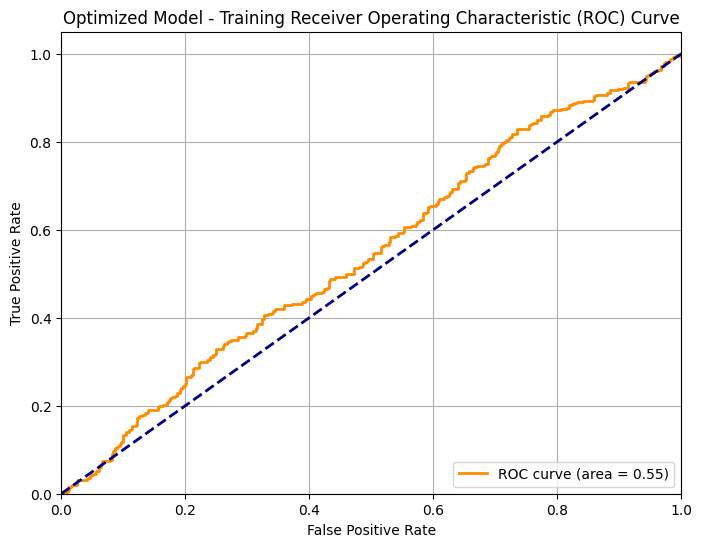


Optimized Model - Test Confusion Matrix:
[[43 55]
 [38 64]]
  True Positives (TP): 64
  True Negatives (TN): 43
  False Positives (FP): 55
  False Negatives (FN): 38

Optimized Model - Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.53      0.44      0.48        98
     Class 1       0.54      0.63      0.58       102

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200

Optimized Model - Test AUC: 0.5825


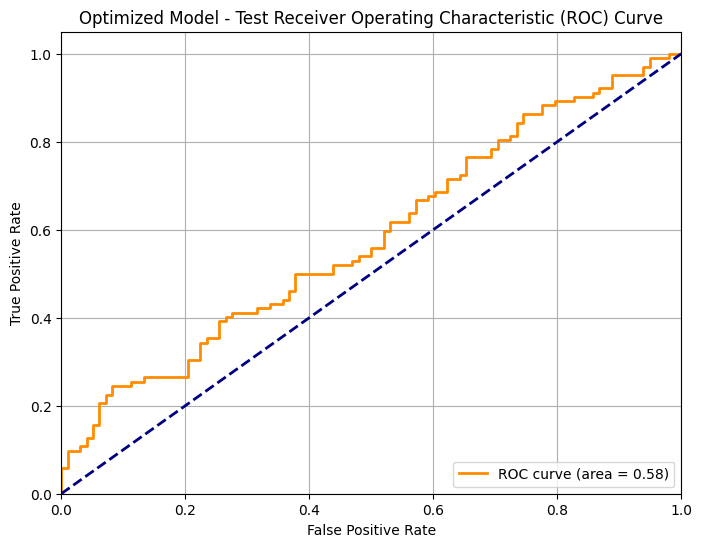

In [25]:
print("\n--- Optimized Model Evaluation Metrics (with L2 regularization) ---")

# Convert tensors to numpy for scikit-learn metrics
# y_train_np_eval and y_test_np_eval are already defined from previous evaluation
y_train_np_eval = y_train.cpu().numpy()
train_predicted_no_l2_np = train_predicted_no_l2.cpu().numpy()
train_outputs_no_l2_np = train_outputs_no_l2.cpu().numpy()

y_test_np_eval = y_test.cpu().numpy()
test_predicted_no_l2_np = test_predicted_no_l2.cpu().numpy()
test_outputs_no_l2_np = test_outputs_no_l2.cpu().numpy()
train_predicted_l2_np = train_predicted_l2.cpu().numpy()
train_outputs_l2_np = train_outputs_l2.cpu().numpy()

test_predicted_l2_np = test_predicted_l2.cpu().numpy()
test_outputs_l2_np = test_outputs_l2.cpu().numpy()


# Confusion Matrix - Training Set (Optimized Model)
cm_train_l2 = confusion_matrix(y_train_np_eval, train_predicted_l2_np)
print("\nOptimized Model - Training Confusion Matrix:")
print(cm_train_l2)
print(f"  True Positives (TP): {cm_train_l2[1, 1]}")
print(f"  True Negatives (TN): {cm_train_l2[0, 0]}")
print(f"  False Positives (FP): {cm_train_l2[0, 1]}")
print(f"  False Negatives (FN): {cm_train_l2[1, 0]}")

# Classification Report - Training Set (Optimized Model)
print("\nOptimized Model - Training Classification Report:")
print(classification_report(y_train_np_eval, train_predicted_l2_np, target_names=['Class 0', 'Class 1']))

# ROC Curve and AUC - Training Set (Optimized Model)
fpr_train_l2, tpr_train_l2, _ = roc_curve(y_train_np_eval, train_outputs_l2_np)
roc_auc_train_l2 = auc(fpr_train_l2, tpr_train_l2)
print(f"Optimized Model - Training AUC: {roc_auc_train_l2:.4f}")

# Plot ROC Curve - Training Set (Optimized Model)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_l2, tpr_train_l2, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_train_l2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Model - Training Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# Confusion Matrix - Test Set (Optimized Model)
cm_test_l2 = confusion_matrix(y_test_np_eval, test_predicted_l2_np)
print("\nOptimized Model - Test Confusion Matrix:")
print(cm_test_l2)
print(f"  True Positives (TP): {cm_test_l2[1, 1]}")
print(f"  True Negatives (TN): {cm_test_l2[0, 0]}")
print(f"  False Positives (FP): {cm_test_l2[0, 1]}")
print(f"  False Negatives (FN): {cm_test_l2[1, 0]}")

# Classification Report - Test Set (Optimized Model)
print("\nOptimized Model - Test Classification Report:")
print(classification_report(y_test_np_eval, test_predicted_l2_np, target_names=['Class 0', 'Class 1']))

# ROC Curve and AUC - Test Set (Optimized Model)
fpr_test_l2, tpr_test_l2, _ = roc_curve(y_test_np_eval, test_outputs_l2_np)
roc_auc_test_l2 = auc(fpr_test_l2, tpr_test_l2)
print(f"Optimized Model - Test AUC: {roc_auc_test_l2:.4f}")

# Plot ROC Curve - Test Set (Optimized Model)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_l2, tpr_test_l2, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_test_l2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Optimized Model - Test Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [27]:
# Task 6: Save and load the trained model.
print("\n--- Saving and Loading the Trained Model ---")

# Define a path for saving the model's state dictionary
model_path = 'logistic_regression_model.pth'

# Saving the Model: Save the model's learned weights and biases
# Saving only the state dictionary (model parameters) is preferred
# because it’s more flexible and efficient than saving the entire model object.
torch.save(model.state_dict(), model_path)
print(f"Model saved to: {model_path}")

# Loading the Model: Create a new model instance and load the saved parameters.
# First, create a new instance of the model with the same architecture
loaded_model = logistic_regression(input_dim)
# Then, load the saved state dictionary into the new model instance
loaded_model.load_state_dict(torch.load(model_path))
print(f"Model loaded from: {model_path}")

# Evaluating the Loaded Model: After loading, set the model to evaluation mode.
loaded_model.eval()
print("\nEvaluating the Loaded Model performance...")

# Use torch.no_grad() to ensure that no gradients are computed.
with torch.no_grad():
    # Get predictions on the test set using the loaded model
    loaded_test_outputs = loaded_model(X_test)
    # Apply threshold of 0.5 to convert probabilities to binary predictions
    loaded_test_predicted = (loaded_test_outputs >= 0.5).float()
    # Calculate test accuracy of the loaded model
    loaded_test_accuracy = (loaded_test_predicted == y_test).float().mean().item()

# Print the accuracy of the loaded model
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}")

# Compare with the previously evaluated optimized model's test accuracy
print(f"Original Optimized Model Test Accuracy: {test_accuracy_l2:.4f}")

if abs(loaded_test_accuracy - test_accuracy_l2) < 1e-6:
    print("\nVerification successful: Loaded model performs identically to the trained model.")
else:
    print("\nWarning: Loaded model performance differs from the trained model.")




--- Saving and Loading the Trained Model ---
Model saved to: logistic_regression_model.pth
Model loaded from: logistic_regression_model.pth

Evaluating the Loaded Model performance...
Loaded Model Test Accuracy: 0.5350
Original Optimized Model Test Accuracy: 0.5350

Verification successful: Loaded model performs identically to the trained model.


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [29]:
## Write your code here
print("\n--- Task 7: Hyperparameter Tuning for Learning Rate ---")

# Define Learning Rates to test
learning_rates_to_test = [0.01, 0.05, 0.1]
best_learning_rate = None
best_test_accuracy = -1.0 # Initialize with a very low value

# Fixed number of epochs for tuning
tuning_epochs = 100 # As suggested, 50 or 100 epochs. Using 100 for more stable results.

results = {}

for lr in learning_rates_to_test:
    print(f"\n--- Testing Learning Rate: {lr} ---")

    # Reinitialize the Model and Optimizer for Each Learning Rate
    # Each new learning rate requires reinitializing the model since the optimizer
    # and its parameters are linked to the learning rate.
    current_model = logistic_regression(input_dim)
    current_optimizer = optim.SGD(current_model.parameters(), lr=lr, weight_decay=weight_decay) # Using same weight_decay

    # Train the Model for Each Learning Rate
    print(f"Starting training for {tuning_epochs} epochs with learning rate {lr}...")
    for epoch in range(tuning_epochs):
        current_model.train()
        current_optimizer.zero_grad()
        outputs = current_model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        current_optimizer.step()

        if (epoch + 1) % 20 == 0: # Print loss more frequently during tuning
            print(f"  Epoch [{epoch+1}/{tuning_epochs}], Loss: {loss.item():.4f}")

    # Evaluate and Compare: Evaluate the trained model on the test dataset
    current_model.eval()
    with torch.no_grad():
        test_outputs = current_model(X_test)
        test_predicted = (test_outputs >= 0.5).float()
        current_test_accuracy = (test_predicted == y_test).float().mean().item()

    results[lr] = current_test_accuracy
    print(f"Test Accuracy for Learning Rate {lr}: {current_test_accuracy:.4f}")

    # Track the best learning rate
    if current_test_accuracy > best_test_accuracy:
        best_test_accuracy = current_test_accuracy
        best_learning_rate = lr

print("\n--- Hyperparameter Tuning Results ---")
for lr, acc in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc:.4f}")

# Report the learning rate that gives the highest test accuracy
print(f"\nBest Learning Rate found: {best_learning_rate} with Test Accuracy: {best_test_accuracy:.4f}")




--- Task 7: Hyperparameter Tuning for Learning Rate ---

--- Testing Learning Rate: 0.01 ---
Starting training for 100 epochs with learning rate 0.01...
  Epoch [20/100], Loss: 0.7271
  Epoch [40/100], Loss: 0.7238
  Epoch [60/100], Loss: 0.7208
  Epoch [80/100], Loss: 0.7180
  Epoch [100/100], Loss: 0.7154
Test Accuracy for Learning Rate 0.01: 0.5200

--- Testing Learning Rate: 0.05 ---
Starting training for 100 epochs with learning rate 0.05...
  Epoch [20/100], Loss: 0.7460
  Epoch [40/100], Loss: 0.7240
  Epoch [60/100], Loss: 0.7104
  Epoch [80/100], Loss: 0.7022
  Epoch [100/100], Loss: 0.6974
Test Accuracy for Learning Rate 0.05: 0.4850

--- Testing Learning Rate: 0.1 ---
Starting training for 100 epochs with learning rate 0.1...
  Epoch [20/100], Loss: 0.7129
  Epoch [40/100], Loss: 0.6984
  Epoch [60/100], Loss: 0.6932
  Epoch [80/100], Loss: 0.6913
  Epoch [100/100], Loss: 0.6907
Test Accuracy for Learning Rate 0.1: 0.5400

--- Hyperparameter Tuning Results ---
Learning Rate

### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


In [ ]:
## Write your code here

import pandas as pd
import matplotlib.pyplot as plt

# Extract the weights of the linear layer
## Write your code here

# Create a DataFrame for feature importance
## Write your code here





Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
